PyTorch Basics

In [98]:
import torch
import numpy as np

Create Tensor From List

In [99]:
data = [[1,2], [5,7]]
tensors = torch.tensor(data)

In [100]:
tensors

tensor([[1, 2],
        [5, 7]])

Create from numpy

In [101]:
np_array  = np.arange(10)
tensor_np = torch.from_numpy(np_array)

In [102]:
tensor_np

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
array2 = np.arange(1,10)
tensors2 = torch.from_numpy(array2)
tensors2

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

Shape, ndim, and dtype

In [104]:
tensors.shape

torch.Size([2, 2])

In [105]:
tensors2.shape

torch.Size([9])

In [106]:
tensors.ndim

2

In [107]:
tensors2.ndim

1

In [108]:
tensors.dtype


torch.int64

In [109]:
tensors2.dtype

torch.int64

Tensor Operations

In [110]:
ten1 = torch.tensor([1,2,3])
ten2 = torch.tensor([4,5,6])
ten1 + ten2

tensor([5, 7, 9])

In [111]:
torch.add(ten1, ten2)

tensor([5, 7, 9])

In [112]:
ten1 - ten2

tensor([-3, -3, -3])

In [113]:
torch.sub(ten1, ten2)

tensor([-3, -3, -3])

In [114]:
ten1 * 10

tensor([10, 20, 30])

In [115]:
torch.matmul(ten1, ten2)

tensor(32)

In [116]:
matrix1 = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
matrix1.shape

torch.Size([4, 3])

In [117]:
matrix2 = torch.tensor([[4,5], [6,3], [8,7]])

In [118]:
matrix2.shape

torch.Size([3, 2])

In [119]:
multiply = torch.matmul(matrix1, matrix2)

In [120]:
multiply

tensor([[ 40,  32],
        [ 94,  77],
        [148, 122],
        [202, 167]])

In [121]:
multiply.shape

torch.Size([4, 2])

In [122]:
matrix1

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [123]:
matrix1.T


tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

In [124]:
zeroTensor = torch.zeros(3,3)

In [125]:
zeroTensor

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [126]:
onesTensor = torch.ones(3,4)

In [127]:
onesTensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [128]:
negativeTensor = torch.randn(3,4)
negativeTensor

tensor([[-0.0872, -0.7946, -0.0046,  1.9461],
        [-2.3049, -1.2736,  1.0904,  0.4842],
        [ 0.2571, -0.2868, -0.6380,  0.5703]])

In [129]:
positiveTensor = torch.rand(3,3)
positiveTensor

tensor([[0.5459, 0.4857, 0.0077],
        [0.0555, 0.9290, 0.1704],
        [0.6304, 0.2397, 0.4635]])

In [130]:
customFill = torch.full((3,3), 6)

In [131]:
customFill

tensor([[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]])

Working with FMNIST Data

In [132]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

In [133]:
train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download= True,
    transform = ToTensor()
)

In [134]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

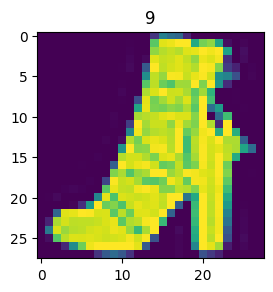

In [135]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,10))
for i in range(12):
  plt.subplot(3,3,1+1)
  sample_image, sample_label = train_data[i]
  plt.imshow(sample_image[0])
  plt.title(sample_label)

In [136]:
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download= True,
    transform = ToTensor()
)


In [137]:
batch_size = 64
training = DataLoader(train_data, batch_size=batch_size)
testing = DataLoader(test_data, batch_size=batch_size)

for X, y in testing:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [138]:
for X, y in training:
  print(torch.max(X))
  print(torch.min(X))
  break

tensor(1.)
tensor(0.)


In [155]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.build_model = nn.Sequential(nn.Linear(28*28, 512),
                                      nn.ReLU(),
                                      nn.Linear(512, 512),
                                      nn.ReLU(),
                                      nn.Linear(512, 10))
  def forward(self, x):
    x = self.flatten(x)
    dnn = self.build_model(x)
    return dnn


In [156]:
model = NeuralNetwork()

In [157]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

In [158]:
def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    pred = model(X)
    loss = loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [159]:
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0,0
  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
      test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [160]:
for epoch in range(5):
  print(f"Epoch {epoch+1}\n-------------------------------")
  train(training, model, loss_fn, optimizer)
  test(testing, model, loss_fn)

Epoch 1
-------------------------------
loss: 2.309561 [    0/60000]
loss: 2.197305 [ 6400/60000]
loss: 1.960470 [12800/60000]
loss: 1.793691 [19200/60000]
loss: 1.418175 [25600/60000]
loss: 1.270689 [32000/60000]
loss: 1.170661 [38400/60000]
loss: 1.023110 [44800/60000]
loss: 0.986701 [51200/60000]
loss: 0.900538 [57600/60000]
Test Error: 
 Accuracy: 68.7%, Avg loss: 0.004927 

Epoch 2
-------------------------------
loss: 0.923365 [    0/60000]
loss: 0.945822 [ 6400/60000]
loss: 0.702365 [12800/60000]
loss: 0.905428 [19200/60000]
loss: 0.729079 [25600/60000]
loss: 0.748346 [32000/60000]
loss: 0.778594 [38400/60000]
loss: 0.734296 [44800/60000]
loss: 0.724177 [51200/60000]
loss: 0.716240 [57600/60000]
Test Error: 
 Accuracy: 75.6%, Avg loss: 0.002923 

Epoch 3
-------------------------------
loss: 0.661520 [    0/60000]
loss: 0.751011 [ 6400/60000]
loss: 0.519472 [12800/60000]
loss: 0.774017 [19200/60000]
loss: 0.622651 [25600/60000]
loss: 0.643344 [32000/60000]
loss: 0.656410 [38400/